# Dipolo

Quando nos distanciamos do par fonte e sumidouro, a ponto da distancia entre eles se aproximar a zero, as singularidades passam a parecer uma única, a qual é chamada de dipolo.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
#para plotar os gráficos em linha
%matplotlib inline

Considerando uma fonte de intensidade $\sigma$ na posição $\bigg( -\frac{l}{2}, 0 \bigg)$ e um sumidouro de mesma intensidade negativa em $\bigg( \frac{l}{2}, 0 \bigg)$.

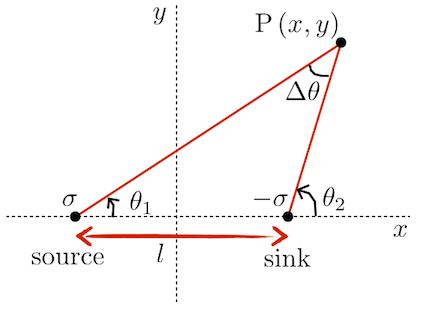

A função corrente associada ao dipolo pode ser escrita como:

$$ \psi(x,y) = \frac{\sigma}{2\pi}(\theta_1 - \theta_2) = -\frac{\sigma}{2\pi}\Delta \theta $$

Nós definimos a intensidade do dipolo por $\kappa = \sigma l$.

A função corrente de um dipolo pode ser avaliada por:

$$ \psi(x,y) = \lim_{l \rightarrow 0} \bigg(-\frac{\sigma}{2\pi}d \theta \bigg)\ \ \ e\ \ \ \sigma l = constante $$

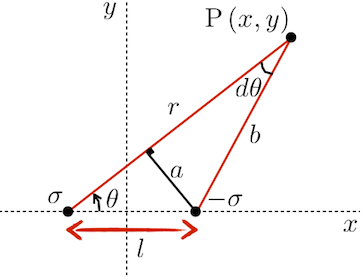

Da figura anterior, podemos deduzir:

$$ d\theta = \frac{a}{b} = \frac{l\sin \theta}{r-l\cos \theta} $$

Com isso conseguimos obter a função-corrente em coordenadas cilindricas:

$$ \psi(r,\theta) = \lim_{l \rightarrow 0} \bigg(-\frac{\sigma l}{2\pi}\frac{\sin \theta}{r-l\cos \theta}\bigg)\ \ \ e\ \ \ \sigma l = constante $$

ou,

$$ \psi(r,\theta) = -\frac{\kappa}{2\pi}\frac{\sin \theta}{r} $$

Em coordenadas cartesianas:

$$ \psi(x,y) = -\frac{\kappa}{2\pi}\frac{y}{x^2 + y^2} $$

E os componentes da velocidade fica:

$$ u(x,y) = -\frac{\kappa}{2\pi}\frac{x^2 - y^2}{(x^2 + y^2)^2} $$
$$ v(x,y) = -\frac{\kappa}{2\pi}\frac{2xy}{(x^2 + y^2)^2} $$

Com a teoria visitada, é hora de programar:

In [2]:
n_points = 50
x_inicio, x_fim = -2.0, 2.0
y_inicio, y_fim = -1.0, 1.0
x = np.linspace(x_inicio,x_fim,n_points)
y = np.linspace(y_inicio,y_fim,n_points)
X, Y = np.meshgrid(x, y)

In [3]:
kappa = 1.0 #Intensidade do dipolo
x_dipolo, y_dipolo = 0.0, 0.0 #coordenada do dipolo

Vamos definir uma função get_velocity_doublet( ) assim como feito para as fontes/sumidouros

In [4]:
def get_velocity_doublet(forca, xd, yd, X, Y):
    """
    Retorna o campo de velocidades dado um dipolo

    Parametros
    ---------
    forca:float
        força do dipolo
    xd: float
        coordenada x do dipolo
    yd: float
        coordenada y do dipolo
    X: Array numpy 2D de float
        coordenadas x da malha de pontos
    Y: Array numpy 2D de float
        coordenadas y da malha de pontos

    Retorna
    ---------
    u: array numpy 2D de float
        componentes x do campo vetorial de velocidades
    v: array numpy 2D de float
        componentes y do campo vetorial de velocidades
    """
    u = (-forca/(2*math.pi)*((X-xd)**2 - (Y-yd)**2)/((X-xd)**2 + (Y-yd)**2)**2)
    v = (-forca/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2 + (Y-yd)**2)**2)

    return u,v

def get_stream_function_doublet(forca, xd, yd, X, Y):
    """
    Retorna a função-corrente dado um dipolo

    Parametros
    ---------
    forca:float
        força do dipolo
    xd: float
        coordenada x do dipolo
    yd: float
        coordenada y do dipolo
    X: Array numpy 2D de float
        coordenadas x da malha de pontos
    Y: Array numpy 2D de float
        coordenadas y da malha de pontos

    Retorna
    ---------
    psi: array numpy 2D de floats
        A função-corrente
    """
    psi = -forca/(2*math.pi)*(Y-yd)/((X-xd)**2 + (Y-yd)**2)

    return psi


Com as funções definidas, podemos utilizalas para estudar o efeito do dipolo em um fluxo

In [5]:
#calculando as componentes da velocidade e a função corrente
u_dipolo, v_dipolo = get_velocity_doublet(kappa,x_dipolo,y_dipolo,X,Y)
psi_dipolo = get_stream_function_doublet(kappa,x_dipolo,y_dipolo,X,Y)

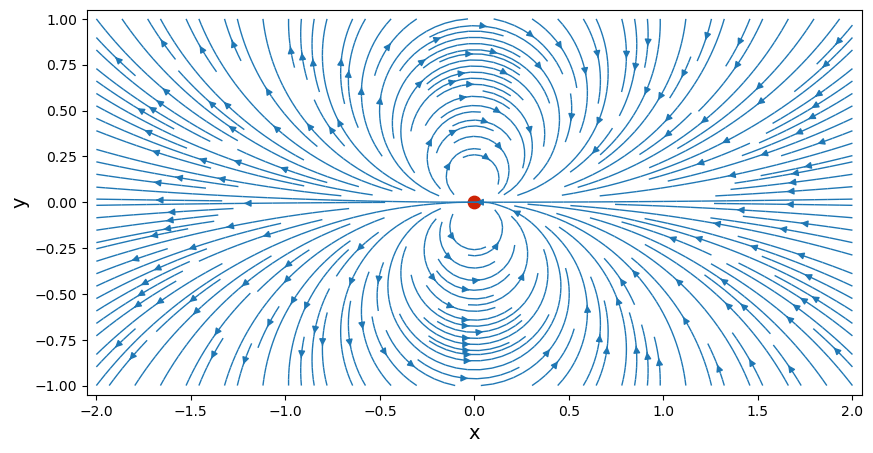

In [6]:
#plotando as linhas de corrente
width = 10.0
height = (y_fim - y_inicio)/(x_fim - x_inicio) * width

plt.figure(figsize = (width,height))
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.xlim(x_inicio-0.05, x_fim+0.05)
plt.ylim(y_inicio-0.05, y_fim+0.05)

plt.streamplot(X,Y,u_dipolo, v_dipolo,
               density=2,linewidth=1, arrowsize=1,arrowstyle='-|>')
plt.scatter(x_dipolo, y_dipolo, color='#CD2305', s=80, marker='o')

Agora iremos testar a sobreposição de um dipolo em uma corrente livre

In [7]:
u_inf = 1.0

u_flivre = u_inf * np.ones((n_points, n_points), dtype=float)
v_flivre = np.zeros((n_points, n_points), dtype=float)

psi_flivre = u_inf * Y

In [8]:
#sobreposição de um dipolo em uma corrente livre
u = u_flivre + u_dipolo
v = v_flivre + v_dipolo
psi = psi_flivre + psi_dipolo

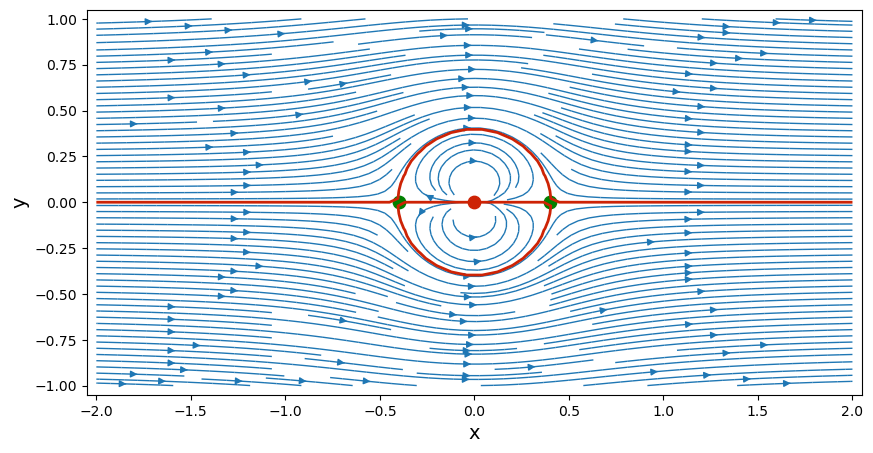

In [9]:
#plotando as linhas de corrente
width = 10.0
height = (y_fim - y_inicio)/(x_fim - x_inicio) * width

plt.figure(figsize = (width,height))
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.xlim(x_inicio-0.05, x_fim+0.05)
plt.ylim(y_inicio-0.05, y_fim+0.05)
plt.streamplot(X,Y,u, v,
               density=2,linewidth=1, arrowsize=1,arrowstyle='-|>')
plt.contour(X, Y, psi,
            levels = [0.], colors = '#CD2305', linewidths=2, linestyles='solid')
plt.scatter(x_dipolo, y_dipolo, color='#CD2305', s=80, marker='o')

#calculando os pontos de estagnação
x_estag1, y_estag1 = +math.sqrt(kappa/(2*math.pi*u_inf)), 0.0
x_estag2, y_estag2 = -math.sqrt(kappa/(2*math.pi*u_inf)), 0.0

#plotagem dos pontos de estagnação
plt.scatter([x_estag1,x_estag2], [y_estag1,y_estag2],
            color='g', s=80, marker='o')

Conseguimos ver que as linhas de corrente se comportam de forma semelhante a como se comportam ao encontrar um cilindro como obstáculo.

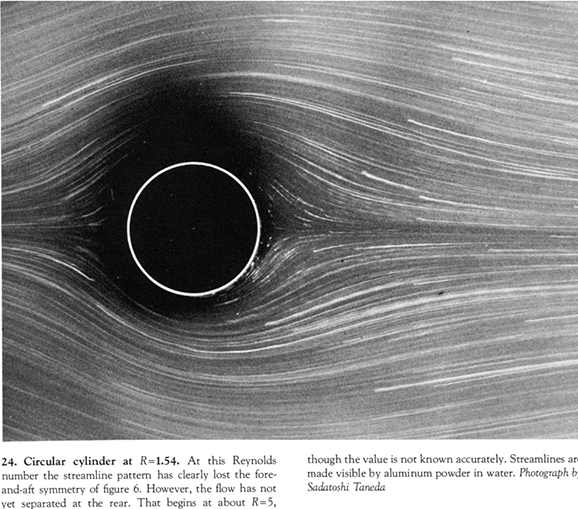

Imagem obtida por S Taneda e retirada de "Album of Fluid Motion" de Milton Van Dyke

### Coeficiente de pressão

Lembrando que o coeficiente $\bold{C_p}$ é dado por:

$$ C_p = 1 - \bigg(\frac{U}{U_\infty}\bigg)^2 $$

e para o ponto de estagnação de um fluido incompressível, temos $\bold{C_p = 1}$.

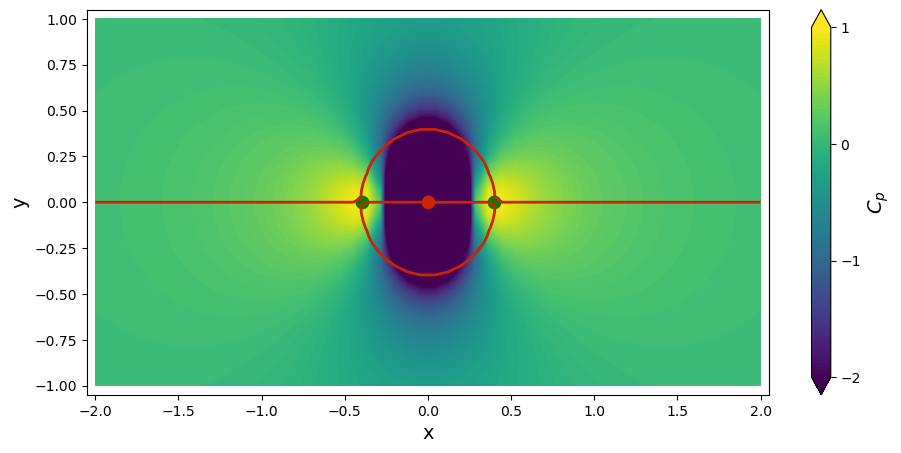

In [11]:
#calculando o coeficiente de pressão
cp = 1.0 - (u**2 + v**2) / u_inf**2

#plotagem do campo do coeficiente de pressão
width = 10
height = (y_fim - y_inicio)/(x_fim - x_inicio) * width

plt.figure(figsize = (1.1*width,height))
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.xlim(x_inicio-0.05, x_fim+0.05)
plt.ylim(y_inicio-0.05, y_fim+0.05)

contf = plt.contourf(X,Y,cp,
                    levels = np.linspace(-2.0,1.0,100), extend = 'both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize = 14)
cbar.set_ticks([-2.0,-1.0,0.0,1.0])

plt.scatter(x_dipolo,y_dipolo,
            color = '#CD2305', s=80, marker='o')
plt.contour(X,Y,psi,
            levels = [0.],colors = '#CD2305', linewidths = 2, linestyles = 'solid')
plt.scatter([x_estag1, x_estag2], [y_estag1,y_estag2],
            color = 'g', s=80, marker = 'o')